In [33]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image,Image,ImageEnhance
import requests
import matplotlib.pyplot as plt

#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#image = Image.open(requests.get(url, stream=True).raw)
img = r"C:\Users\hp\Machine Learning\Retail_product position\product_images\qr1.jpg"
image = Image.open(img)


processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}")

Detected bottle with confidence 0.991 at location [999.13, 4.06, 1683.9, 1596.59]


https://huggingface.co/facebook/detr-resnet-50

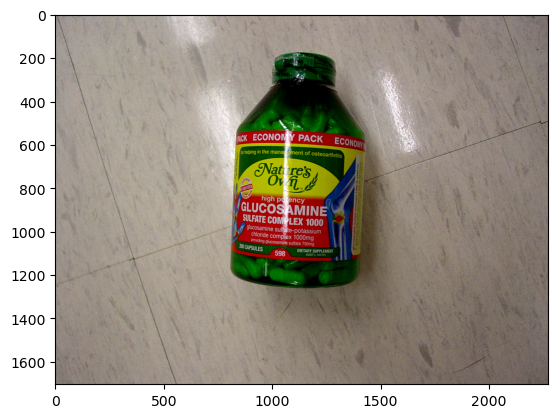

In [61]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image,Image,ImageEnhance
import matplotlib.pyplot as plt 
img =r"C:\Users\hp\Machine Learning\Retail_product position\product_images\qr4.jpg"
image=Image.open(img)
enhancer = ImageEnhance.Contrast(image)
factor = 1.3
image = enhancer.enhance(factor)
plt.imshow(image)

In [55]:
from PIL import Image
from skimage import filters
import numpy as np 
import cv2 
img =r"C:\Users\hp\Machine Learning\Retail_product position\product_images\qr1.jpg"
image=Image.open(img)

#kernel = np.array([[0, -1, 0],[-1, 5,-1],[0, -1, 0]])

#image_sharp = cv2.filter2D(src=np.array(image), ddepth=-1, kernel=kernel)




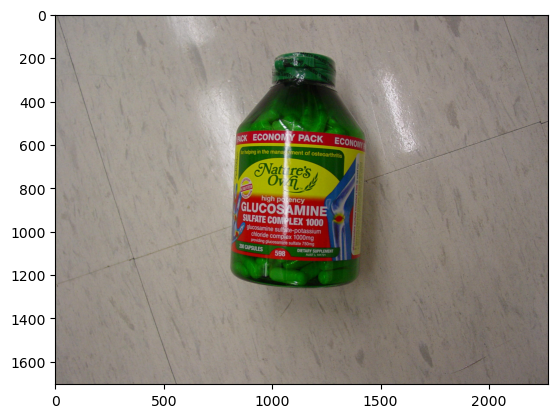

In [72]:
from PIL import Image
from skimage import filters
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

img =r"C:\Users\hp\Machine Learning\Retail_product position\product_images\qr4.jpg"

# Option 1: Open image with PIL
# image = Image.open(img)

# Option 2: Open image with cv2
#image = cv2.imread(img)
image = Image.open(img)
image = np.array(image)
sharpened = filters.unsharp_mask(image, radius=0.1, amount=6)

plt.imshow(sharpened)
plt.show()


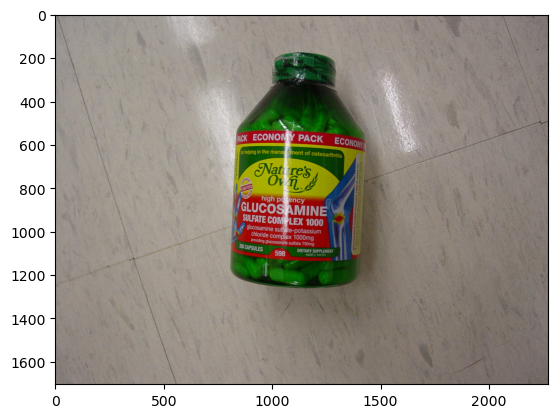

In [73]:
plt.imshow(image)